<a href="https://colab.research.google.com/github/Gilnior/UFMGsisu2021/blob/main/sisuUFMG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install PyPDF2
import PyPDF2
import re
import pandas as pd
import matplotlib.pyplot as plt


     |████████████████████████████████| 81kB 4.6MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-cp37-none-any.whl size=61085 sha256=e0948665d93f5caaaea930c9287a135a94d88a57dc8bc1aeaff5ebb38662229f
  Stored in directory: /root/.cache/pip/wheels/53/84/19/35bc977c8bf5f0c23a8a011aa958acd4da4bbd7a229315c1b7
Successfully built PyPDF2


In [2]:
def rawtext(page=0):
    PDF = open('/content/drive/MyDrive/sisuUFMG.pdf', 'rb')
    pdf = PyPDF2.PdfFileReader(PDF)
    txt = pdf.getPage(page).extractText()
    return txt

In [3]:
def detalhe(i):
  if i == 0:
    return 2
  elif i == 1 :
    return 1
  elif i == 2:
    return 4
  elif i < 4:
    return 3
  elif i == 4:
    return 1


In [4]:
def table(page=0,debug=False):
  x = rawtext(page) 

  columns = ['Nome','Turno','Modalidade','Mínimo','Máximo']
  table = {}
  namep = re.compile(r'[o\d][A-ZÍÃÓÇÔÕÊÉÂÁÉÚ\s()a-z]{5,50}[VNMI][eoan]')
  turnop = re.compile(r'Matutino[1234A]|Noturno[1234A]|Integral[1234A]|Vespertino')
  modalidadep = re.compile(r'[1234]\.[12]\d{3},|Amplaconcorrência\d{3},')
  minimop = re.compile(r'\d{3},\d{2}\d{3}')
  maximop = re.compile(r'\d{3},\d{2}[A-Z2]|\d{3},\d{2}334')
  patterns = [namep,turnop,modalidadep,minimop,maximop]

  for i in range(len(columns)):
    matches = patterns[i].finditer(x)
    lista = []
    for match in matches:
      if i == 0:
        zzz = 1
      else:
        zzz = 0
      value = match.group()
      f = detalhe(i)
      lista.append(value[zzz:-f])
    if i == 0:
      m = lista.pop(0)
    if debug:
      print(len(lista),end=', ')
    table[columns[i]] = lista
  return table


In [5]:
for i in range(16):  # test if everyting is returning all right to all pages
  table(i,debug=True)
  print(i+1)

35, 35, 35, 35, 35, 1
45, 45, 45, 45, 45, 2
45, 45, 45, 45, 45, 3
43, 43, 43, 43, 43, 4
45, 45, 45, 45, 45, 5
45, 45, 45, 45, 45, 6
45, 45, 45, 45, 45, 7
45, 45, 45, 45, 45, 8
45, 45, 45, 45, 45, 9
45, 45, 45, 45, 45, 10
45, 45, 45, 45, 45, 11
45, 45, 45, 45, 45, 12
46, 46, 46, 46, 46, 13
45, 45, 45, 45, 45, 14
45, 45, 45, 45, 45, 15
20, 20, 20, 20, 20, 16


In [6]:
def DataF(i=0):
  t = table(i)
  return pd.DataFrame(t)

In [7]:
DF = DataF()
for n in range(1,16):
  DF = DF.append(DataF(n), ignore_index=True)
DF.head()

,Nome,Turno,Modalidade,Mínimo,Máximo
0,ADMINISTRAÇÃO,Matutino,1.1,"520,04","520,04"
1,ADMINISTRAÇÃO,Matutino,1.2,"642,08","674,66"
2,ADMINISTRAÇÃO,Matutino,2.1,"649,12","649,12"
3,ADMINISTRAÇÃO,Matutino,2.2,"698,38","719,48"
4,ADMINISTRAÇÃO,Matutino,3.1,"559,88","559,88"


In [8]:
# :one:  Número de cursos ofertados no SISU UFMG 2021
#:two:  5 cursos com as maiores notas POR MODALIDADE (Cotas e A.C.)
#:three:  5 cursos com as menores notas POR MODALIDADE (Cotas e A.C.)
#:four:  Número de cursos Matutinos / Noturnos / Integrais

In [9]:
# :one:
DF['Nome'].nunique()

71

In [10]:
# :two:
def topV(i=1, plot=False,):
  modalidades = list(DF['Modalidade'].unique())
  condition =  DF['Modalidade'] == modalidades[i-1]
  ex1 = DF.loc[condition].sort_values(by='Máximo', ascending=False)  # get 5 greatest
  turno = list(ex1['Turno'].values)
  nome = list(ex1['Nome'].values)
  mamamia = []
  for i in range(len(turno)):
    if plot:
      mamamia.append(f"{nome[i][:5]} ({turno[i][0]})")
    else:
            mamamia.append(f"{nome[i]} ({turno[i][0]})")
  ex1['Nome'] = mamamia
  res = ex1.iloc[:5]
  return res.iloc[:,[0,2,4]]
topV()

,Nome,Modalidade,Máximo
534,MEDICINA (I),1.1,"716,42"
566,ODONTOLOGIA (M),1.1,"673,76"
180,DIREITO (M),1.1,"652,40"
345,ENGENHARIA QUÍMICA (M),1.1,"627,78"
189,DIREITO (N),1.1,"624,94"


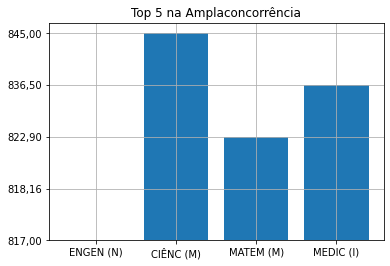

In [16]:
def pltex2(i=1):
  top = topV(i,plot=True).sort_values('Máximo')
  x = list(top['Nome'])
  y = list(top['Máximo'])

  plt.grid()
  plt.title(f"Top 5 na {top['Modalidade'].max()}")
  plt.bar(x,y)

  plt.show()
pltex2(8)

In [12]:
# :three:
def ntopV(i=1, plot=False,):
  modalidades = list(DF['Modalidade'].unique())
  condition =  DF['Modalidade'] == modalidades[i-1]
  ex1 = DF.loc[condition].sort_values(by='Mínimo', ascending=True) 
  turno = list(ex1['Turno'].values)
  nome = list(ex1['Nome'].values)
  mamamia = []
  for i in range(len(turno)):
    if plot:
      mamamia.append(f"{nome[i][:5]} ({turno[i][0]})")
    else:
            mamamia.append(f"{nome[i]} ({turno[i][0]})")
  ex1['Nome'] = mamamia
  res = ex1.iloc[:5]
  return res.iloc[:,[0,2,3]]
ntopV(8)

,Nome,Modalidade,Mínimo
75,BIBLIOTECONOMIA (M),Amplaconcorrência,"615,96"
66,ARQUIVOLOGIA (N),Amplaconcorrência,"619,24"
82,BIBLIOTECONOMIA (N),Amplaconcorrência,"631,40"
321,ENGENHARIA FLORESTAL (M),Amplaconcorrência,"634,24"
447,GESTÃO DE SERVIÇOS DE SAÚDE (N),Amplaconcorrência,"639,62"


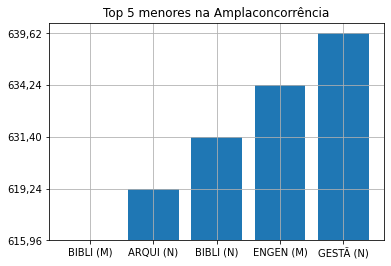

In [17]:
def pltex3(i=1):
  top = ntopV(i,plot=True).sort_values('Mínimo')
  x = list(top['Nome'])
  y = list(top['Mínimo'])

  plt.grid()
  plt.title(f"Top 5 menores na {top['Modalidade'].max()}")
  plt.bar(x,y)

  plt.show()
pltex3(8)